# TensorFlow Demo: MNIST for ML Beginners
Before start using this, please select `Cell` - `All Output` - `Clear` to clear the old results. 

This is taken from the [TensorFlow Tutorial](https://www.tensorflow.org/get_started/mnist/beginners), refer to that for more details.

# Loading MNIST training data

In [23]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images
![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

In [24]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [25]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
sample_img

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

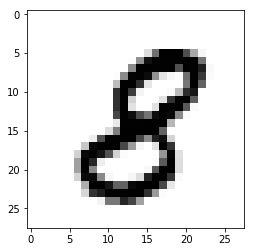

In [26]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels
![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [27]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [28]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

# Defining a Neural Network

## in a graph:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)

## in a vector equation:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

## so that we'll have the weights like this:
blue: positive weights, red: negative weights
![](https://www.tensorflow.org/versions/master/images/softmax-weights.png)

# Construct the graph

In [29]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784], name='x_img') # placeholder vals are provided in a feed_dict when eval/running
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

## Define the Train Step

In [30]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])    # placeholder for the correct label
cross_entropy = -tf.reduce_sum(y_*tf.log(y))   # cross ent is the log of the predicted prob of the correct label
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent_1' type=NoOp>

## Use Gradient Decent to find the optimal weights
![](http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png)
From: [Machine Learning Blog & Software Development News](http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

# Do 1000 rounds of mini-batch training

In [42]:
# initialize variables and session
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})  # feed_dict provides values to placeholders

## Predict for a few samples from test set

In [47]:
import numpy as np

xs = mnist.test.images[:30]
ys = mnist.test.labels[:30]
print("Pred:  ", np.argmax(y.eval(feed_dict={x: xs}), axis=1))# Prediction is the col # with highest prob
print("Actual:", np.argmax(ys, axis=1))

Pred:   [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
Actual: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


## Evaluate accuracy on entire test set

In [48]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9165
